# Bayes 相关

## 问题一

一枚硬币，投了10次，结果为A=[1,0,0,1,1,1,1,1,1,0]，求正面的概率分布

### solve

令 $\theta$ 为正面的概率，其先验分布为[0,1]之间均匀分布，概率密度为$p(\theta)$

$p(\theta | A) = \frac{p(A|\theta)p(\theta)}{p(A)}$


其中，

$p(A|\theta)=\theta^7(1-\theta)^3$

$p(\theta)=1$，

$p(A)=\int_0^1p(A|\theta)p(\theta)d\theta=\int_0^1 \theta^7(1-\theta)^3 p(\theta) d\theta$，

其中，$p(A)$可以看作是用$p(\theta)=1$的分布去取样。当然，现在的式子比较简单，可以直接积分。下面用通用的采样积分的办法来求$p(A)$

0.0007553874330429997


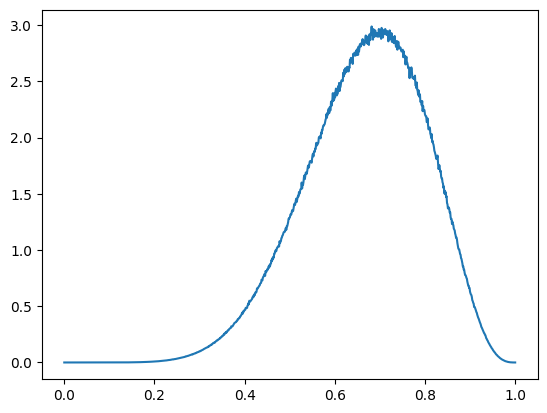

In [5]:
from random import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# p(A)

def pA(n:int=10000):
    s = 0
    for _ in range(n):
        theta = random()
        p = theta**7 * (1-theta)**3
        s += p
    return s / n * 1

print(pA())

# 求的 p(A) 就求得了后验概率分布
def pPost(theta):
    p = theta**7 * (1-theta)**3 / pA()
    return p


thetas = np.linspace(0,1,1000)
probs = pd.Series(index=thetas,data=thetas).map(pPost)

plt.plot(probs)